# Expected Values

Review: **probability density functions** provide a global overview of the random variable's behavior.

In [10]:
suppressWarnings(library('gridExtra'))
suppressWarnings(library('ggplot2'))

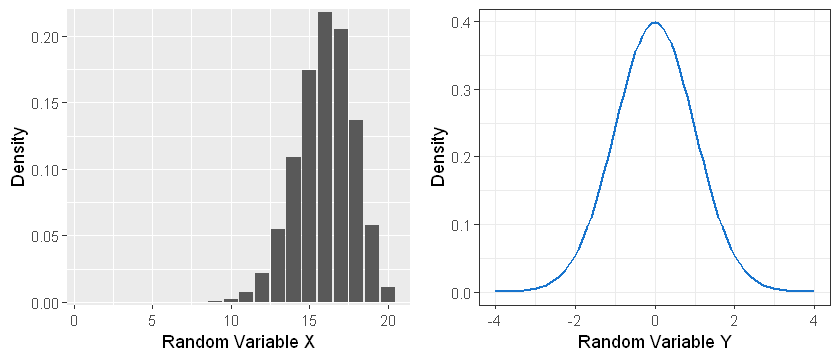

In [8]:
discrete <- ggplot(data.frame(x = 1:20, y = dbinom(1:20, 20, 0.8)), aes(x = x, y = y)) + 
            geom_bar(stat = "identity") +
            scale_y_continuous(expand = c(0.01, 0)) + xlab("Random Variable X") + ylab("Density") + 
            theme(plot.title = element_text(size = rel(1.2), vjust = 1.5))

continous<-ggplot(data.frame(x = c(-4, 4)), aes(x = x)) + 
           stat_function(fun = dnorm, args = list(0, 1),colour = "dodgerblue3",size = 0.7) +
           scale_x_continuous(name = "Random Variable Y") + 
           scale_y_continuous(name = "Density") +
           theme_bw()

options(repr.plot.width=7, repr.plot.height=3)
grid.arrange(discrete, continous, ncol=2)

- <span style="color:green">**Advantage**:</span> PDF details the likelihood of observing **each** value in the **entire** domain of the random variable.
- <span style="color:red">**Disadvantage**:</span> it may provide more information than necessary. Often it is more helpful to summarize certain features of the distribution in only one number.

**Central tendency**: intuitively, a central tendency measure is a value where the random variable realizations will tend to lie. One of the most widely used central tendency measures is the **expected value**.

**Definition 1 (expected value):** let $X$ be a **discrete** random variable with probability function $P_{X}(k)$. The *expected value* of $X$ is denoted by $E(X)$ and is given by

$$E(X)=\sum_{\text {all } k} k \cdot p_{X}(k)$$

Similarly, if $Y$ is a **continuous** random variable with pdf $f_{Y}(y)dy$

$$E(Y)=\int_{-\infty}^{\infty} y \cdot f_{Y}(y) d y$$

### Example 1:

Calculating the expected value of the binomial distribution from scratch. In class you covered Theorem 3.5.1 from the textbook. The theorem states that if $X$ is a binomial random variable with parameters $n$ and $p$, them $E(X)=np$.

In [3]:
# Let's consider the binomial random variable with parameters n=20 and p=0.8

n <-20
p <-0.8
print(paste0('E(X)=',n*p))

[1] "E(X)=16"


To better understand how to apply the definition of expected value and to practice some R skills, let's calculate the expectation of the binomial from scratch:

- First, we need to know what is the domain of the random variable $X$. That is, the set of $k$ values for which $p_{X}(k)>0$. Clearly, it is impossible to obtain more successes than the total number of trials while obtaining zero successes is still plausible. 

In [16]:
# One easy way to confirm the previous statment is to use:
dbinom(0:21, n, p)

[1] 1.048576e-14 8.388608e-13 3.187671e-11 7.650410e-10 1.300570e-08
 [6] 1.664729e-07 1.664729e-06 1.331783e-05 8.656592e-05 4.616849e-04
[11] 2.031414e-03 7.386959e-03 2.216088e-02 5.454985e-02 1.090997e-01
[16] 1.745595e-01 2.181994e-01 2.053641e-01 1.369094e-01 5.764608e-02
[21] 1.152922e-02 0.000000e+00

Following the expected value formula $\left(E(X)=\sum_{\text {all } k} k \cdot p_{X}(k)\right)$, we need to take all the values of $k \in [0,20]$ and multiply each by its likelihood of occurrence. Let's illustrate the process with a graph:

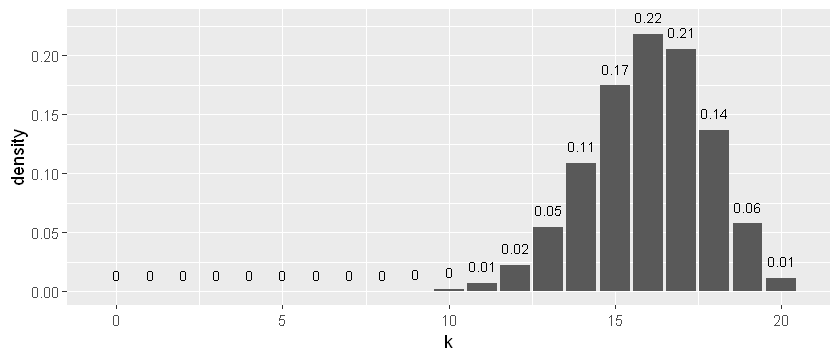

In [27]:
ggplot(data=data.frame(k=0:20,density=dbinom(0:20, n, p)),aes(x = k, y = density)) +
  geom_col() +
  geom_text(aes(label = round(density,2), y = density + 0.01), position = position_dodge(0.9),size = 3,vjust = 0)

$E(X)=\sum_{\text {all } k} k \cdot p_{X}(k)=0.0004 \times 10+0.007 \times 11+0.022 \times 12+\dots+0.011 \times 20$

In [1]:
# Create a function to calculate the expectation of a discrete random variable

Ed <- function(pdf, pdf_parameters, ki = -Inf, kf = Inf){
    expectation <- 0
    for (j in ki:kf){
        expectation <- expectation + do.call(pdf,c(j,pdf_parameters))*j
    }
    return(expectation)
}

In [4]:
Ed(dbinom,list(n,p),0,20)

[1] 16

To confirm that the function works for any arbitrary discrete function. I will also try the **Hypergeometric Distribution**. In class you showed that if $X$ distributes hypergeometric with parameters $r,w$ and $n$, then $E(X)= \frac{rn}{r+w}$. In words, $r$ and $w$ represent the number of red and white balls. A sample of size $n$ is drawn from the container. 

In [79]:
# Let's assume n=20, r=5, w=15. 
n <- 11
r <- 10 
w <- 15
print(paste0('E(X)=',((r*n)/(r+w))))

[1] "E(X)=4.4"


In [80]:
Ed(dhyper,list(r,w,n),0,11)

[1] 4.4

### Example 2:

Extension to any continuous variable

The normal distribution has two parameters: mean ($\mu$) and variance ($\sigma^2$). If $X$ is a random variable following a normal distribution with parameters $\mu$ and $\sigma^2$ $\left(X \sim N(\mu,\sigma^2)\right)$, it can be shown that $E(X)=\mu$.

Using the normal distribution as the base, this code calculates the expected value using **Definition 1:**

In [83]:
integrate(function(x){x * dnorm(x,mean=3)}, -Inf, Inf)

3 with absolute error < 0.00033

Now let's construct a function to calculate the expected value of any arbitrary continuous variable. Instead of using the ```do.call``` approach, this function uses the three dots constructions to allow for arbitrary parameters: 

In [16]:
Ec <- function(pdf, ..., ki = -Inf, kf = Inf) {
  integrate(function(x){x * pdf(x, ...)}, ki, kf)
}

In [86]:
Ec(dnorm, mean=3)

3 with absolute error < 0.00033

In [ ]:
fy <- function(y){1/(y^2)}

In [ ]:
integrate(fy,1,Inf)

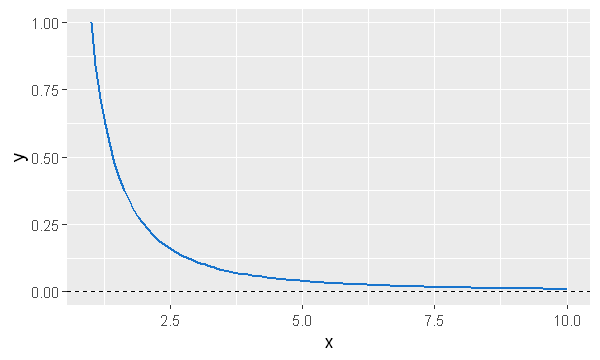

In [14]:
options(repr.plot.width=5, repr.plot.height=3)
ggplot(data.frame(x = c(1, 10)), aes(x = x)) + 
    stat_function(fun = fy,colour = "dodgerblue3",size = 0.7)+
    geom_hline(yintercept=0, linetype="dashed")

To check that the function works for any arbitrary continuous random variable. Let's take the example of an exponential distribution. This distribution predicts the amount of waiting time until the next event. For example the amount of time you need to wait until the bus arrives (arrival time). The exponential distribution takes the parameter $\lambda$ as input. Intuitively, this parameter represents the proportion of times that the event occurs during a unit of time.

- Assuming $Y \sim exp(\lambda)$, it can be shown that $E(Y)=1/\lambda$

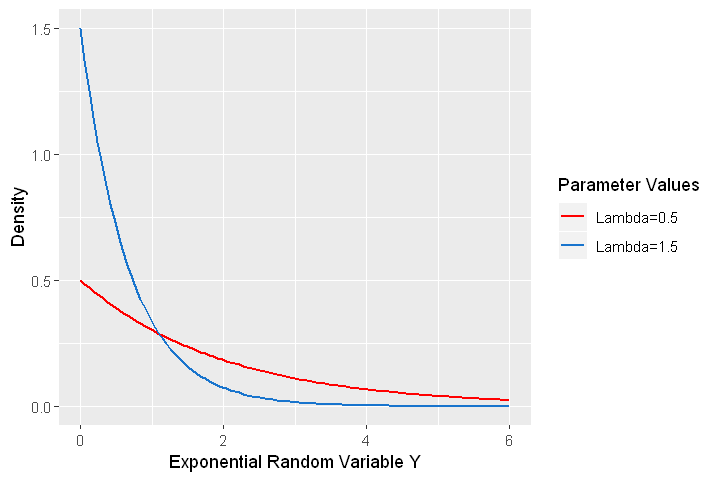

In [115]:
exp <- ggplot(data.frame(x = c(0, 6)), aes(x=x)) +
       stat_function(fun = dexp, args = list(0.5), aes(colour = "Lambda=0.5"),size = 0.7) +
       stat_function(fun = dexp, args = list(1.5), aes(colour = "Lambda=1.5"),size = 0.7) +
       scale_colour_manual("Parameter Values", values = c("red", "dodgerblue3")) +
       xlab("Exponential Random Variable Y") + ylab("Density")


options(repr.plot.width=6, repr.plot.height=4)
exp

In [123]:
Ec(dexp, rate=0.5)
Ec(dexp, rate=1.5)

2 with absolute error < 7.7e-06

0.6666667 with absolute error < 8.1e-05

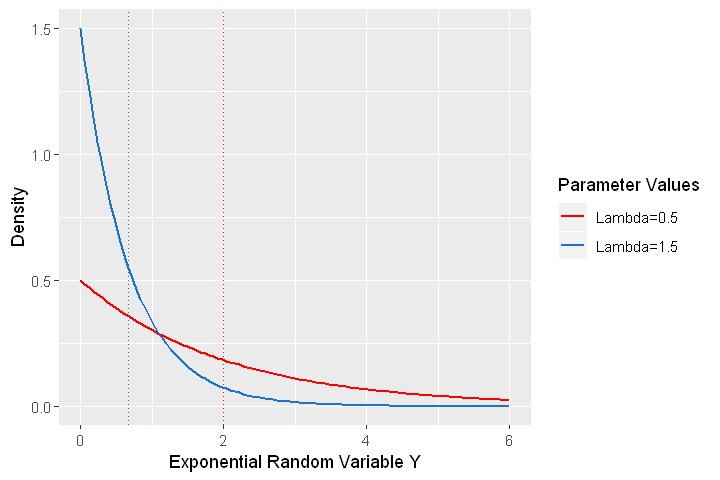

In [122]:
exp_ev <- ggplot(data.frame(x = c(0, 6)), aes(x=x)) +
          stat_function(fun = dexp, args = list(0.5), aes(colour = "Lambda=0.5"),size = 0.7) +
          stat_function(fun = dexp, args = list(1.5), aes(colour = "Lambda=1.5"),size = 0.7) +
          geom_vline(xintercept = Ec(dexp, rate=0.5)$value, color="red", linetype="dotted") +
          geom_vline(xintercept = Ec(dexp, rate=1.5)$value, color="dodgerblue3", linetype="dotted") +
          scale_colour_manual("Parameter Values", values = c("red", "dodgerblue3")) +
          xlab("Exponential Random Variable Y") + ylab("Density")

options(repr.plot.width=6, repr.plot.height=4)
exp_ev

# The Expected Value of a Function of a Random Variable

Sometimes the object of interest is not the random variable $X$ itself but transformations of it. Sometimes the distribution of the new random variable $Y=g(X)$ is easy to compute and **Definition 1** can be used to calculate the expectation of $Y$. In cases when the calculation of the pdf of $Y$ is complicated, the following theorem can be used:

**Theorem 1:** Suppose $X$ is a discrete random variable with pdf $p_{X}(k)$. Let $g(X)$ be a function of $X$. Then the expected value of the random variable $g(X)$ is given by


$$E[g(X)]=\sum_{\text {all } k} g(k) \cdot p_{X}(k),$$

provided that $\sum_{a \|, k}|g(k)| p_{X}(k)<\infty$.

If $Y$ is a continuous random variable with pdf $f_{Y}(y)$, and if $g(Y)$ is a continuous function, then the expected value of the random variable $g(Y)$ is

$$E[g(Y)]=\int_{-\infty}^{\infty} g(y) \cdot f_{Y}(y) d y$$

provided that $\int_{-\infty}^{\infty}|g(y)| f_{Y}(y) d y<\infty$.


### Example 3:

Expected value of a Chi-squared distribution ($\chi^{2}$-distribution).

It can be shown by methods discussed in chapter 3.8 (*Transforming and Combining Random Variables*) that if $Z_{1}, \dots, Z_{k}$ are independent, standard normal random variables, then 

$$Q=\sum_{i=1}^{k} Z_{i}^{2}$$

distributes Chi-squared with $k$ degrees of freedom $\left(Q \sim \chi^{2}(k)\right)$. Thus, if  $k=1$, $Q=Z^{2} \sim \chi^{2}(1)$. It is also possible to show that $E\left(\chi^{2}(k)\right)=k$ so that when $k=1$, $E(Q)=1$.

If we use the function we already created and pass as inputs the Chi-squared distribution with 1 degree of freedom we should get the result that the expectation equals one.

In [124]:
Ec(dchisq, df=1)

1 with absolute error < 4.9e-05

For pedagogical purposes, let's use **Theorem 1** to compute the expectation of the transformed standard normal. The first step is to create a new version of the function ```Ec``` that allows for transformations of the random variable.

In [132]:
Ec_transformation <- function(pdf, ..., g = identity, ki = -Inf, kf = Inf){
      integrate(function(x){g(x) * pdf(x, ...)}, ki, kf)
}

In [143]:
sq <- function(x){x^2}
Ec_transformation(dchisq, df=1)
Ec_transformation(dnorm, mean=0, g=sq)

1 with absolute error < 4.9e-05

1 with absolute error < 1.2e-07